In [1]:
from src.utils import load_img_info
import pandas as pd

TEST_ANN_PATH = "data/thermal_pose/coco_fmt/dataset/annotations/thermalPose_test.json"
VAL_ANN_PATH = "data/thermal_pose/coco_fmt/dataset/annotations/thermalPose_val.json"
TRAIN_ANN_PATH = "data/thermal_pose/coco_fmt/dataset/annotations/thermalPose_train.json"

Load image info, specifying file names, image id and dimensions

In [2]:
test_img_info = load_img_info(TEST_ANN_PATH, "test")
val_img_info = load_img_info(VAL_ANN_PATH, "val")
train_img_info = load_img_info(TRAIN_ANN_PATH, "train")
merged_img_info = pd.concat([train_img_info,val_img_info,test_img_info])
merged_img_info.sample(5)

,file_name,height,width,image_id,split
54,thermal_10_54_7.jpg,480,640,54,test
131,01_00877.png,387,492,131,val
72,000574.png,480,640,72,val
530,FLIR_06761.jpeg,512,640,530,train
71,thermal_10_12_21.jpg,480,640,71,test


Load annotation info, where each row corresponds to a specific annotation instance

In [3]:
from src.utils import load_ann_info
import pandas as pd
test_anns = load_ann_info(TEST_ANN_PATH, "test")
val_anns = load_ann_info(VAL_ANN_PATH, "val")
train_anns = load_ann_info(TRAIN_ANN_PATH,"train")
merged_anns = pd.concat([train_anns, val_anns, test_anns])
merged_anns.sample(5)

,annotation_id,iscrowd,image_id,category_id,num_keypoints,keypoints,bbox,segmentation,area,split
529,529,0,343,1,17,"[97.08, 33.09, 2, 96.65, 31.49, 2, 95.92, 31.6...","[79.45, 25.8, 28.13, 73.91]","[[79.45, 25.8, 107.58, 25.8, 107.58, 99.71, 79...",2079.09,train
814,814,0,532,1,17,"[153.46, 258.47, 2, 154.89, 256.56, 2, 152.74,...","[132.94, 248.93, 34.6, 81.14]","[[132.94, 248.93, 167.54, 248.93, 167.54, 330....",2807.44,train
349,349,0,223,1,17,"[469.85, 60.3, 2, 472.86, 53.77, 2, 462.31, 57...","[420.6, 31.16, 97.99, 302.01]","[[420.6, 31.16, 518.59, 31.16, 518.59, 333.17,...",29593.96,train
155,155,0,102,1,17,"[202.2, 220.48, 2, 201.32, 216.08, 2, 201.1, 2...","[170.48, 189.87, 129.3, 168.06]","[[170.48, 189.87, 299.78, 189.87, 299.78, 357....",21730.16,test
22,22,0,14,1,17,"[396.99, 214.83, 2, 401.6, 211.82, 2, 392.18, ...","[352.93, 194.95, 81.64, 177.39]","[[352.93, 194.95, 434.57, 194.95, 434.57, 372....",14482.12,test


In [4]:
complete_anns = pd.merge(merged_img_info, merged_anns, on = ["image_id","split"], how = "inner")
complete_anns.head()

,file_name,height,width,image_id,split,annotation_id,iscrowd,category_id,num_keypoints,keypoints,bbox,segmentation,area
0,FLIR_video_02047.jpeg,134,138,0,train,0,0,1,16,"[118.62, 40.62, 2, 119.21, 38.56, 2, 118.04, 3...","[104.55, 31.67, 32.45, 84.33]","[[104.55, 31.67, 137, 31.67, 137, 116, 104.55,...",2736.51
1,image_000042.png,160,120,1,train,1,0,1,17,"[48.16, 33.11, 2, 48.66, 30.6, 2, 47.66, 31.1,...","[18.33, 18.67, 59.78, 105.33]","[[18.33, 18.67, 78.11, 18.67, 78.11, 124.0, 18...",6296.63
2,frame_03934.png,512,477,2,train,2,0,1,17,"[54.42, 57.24, 2, 56.89, 53.36, 2, 52.3, 53.71...","[24.73, 38.52, 58.31, 202.12]","[[24.73, 38.52, 83.04, 38.52, 83.04, 240.64, 2...",11785.62
3,frame_03934.png,512,477,2,train,3,0,1,17,"[123.9, 92.2, 2, 131.22, 87.8, 2, 118.54, 87.8...","[83.9, 56.1, 84.39, 293.66]","[[83.9, 56.1, 168.29, 56.1, 168.29, 349.76, 83...",24781.97
4,frame_03934.png,512,477,2,train,4,0,1,17,"[248.29, 78.54, 1, 246.83, 73.66, 1, 251.71, 7...","[219.51, 52.68, 76.59, 241.95]","[[219.51, 52.68, 296.1, 52.68, 296.1, 294.63, ...",18530.95


### Visualize COCO Annotations

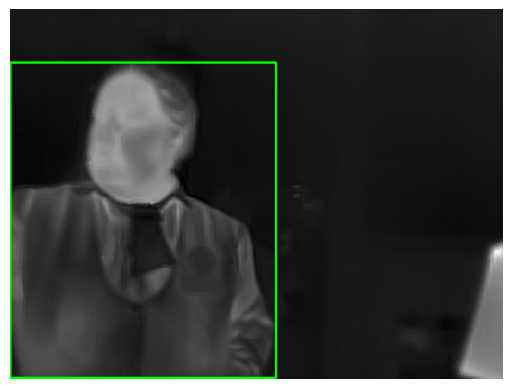

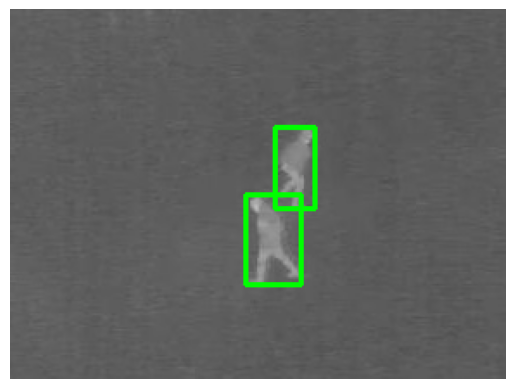

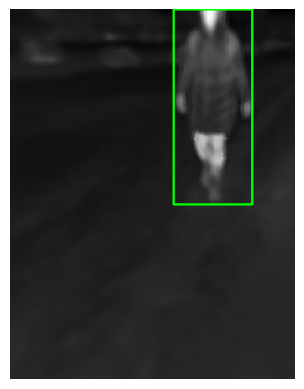

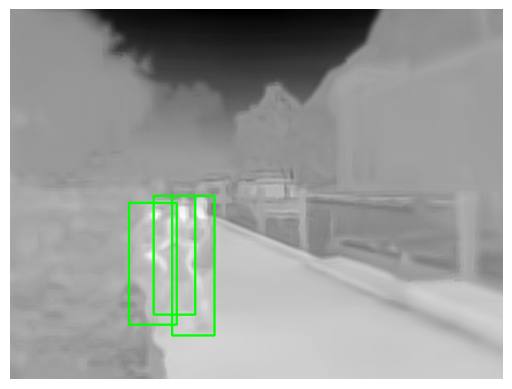

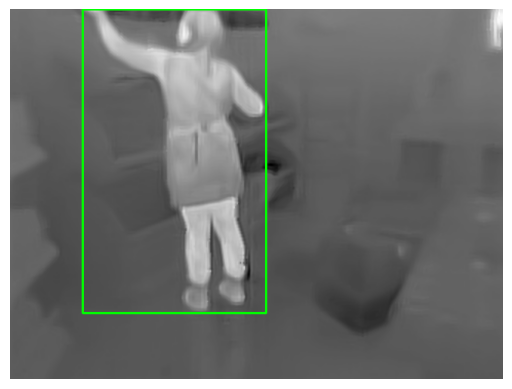

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

n_show = 10
drawable_anns = complete_anns.copy().sample(frac=1)
grouped_anns = drawable_anns.groupby("file_name", sort=False)
drawn_imgs = []
counter = 0
for filename, img_anns in grouped_anns:
    split = img_anns["split"].iloc[0]
    anns = img_anns["bbox"]
    img = cv2.imread(os.path.join(f"data/thermal_pose/coco_fmt/dataset/{split}/{filename}"))
    for bbox in anns:
        x1 = int(bbox[0])
        y1 = int(bbox[1])
        x2 = int(x1 + bbox[2])
        y2 = int(y1 + bbox[3])
        img = cv2.rectangle(img, (x1,y1),(x2,y2), color = (0,255,0),thickness=2)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    counter += 1
    if counter == n_show:
        break
    




## Transform COCO to YOLO

In [45]:
import os
import shutil

YOLO_DATA_BASE_PATH = "data/thermal_pose/yolo_fmt/dataset"
COCO_DATA_BASE_PATH = "data/thermal_pose/coco_fmt/dataset"

def create_folder_structure():
    os.mkdir(YOLO_DATA_BASE_PATH)
    anns_path = os.path.join(YOLO_DATA_BASE_PATH, "labels")
    imgs_path = os.path.join(YOLO_DATA_BASE_PATH, "images")
    os.mkdir(anns_path)
    os.mkdir(os.path.join(anns_path,"train"))
    os.mkdir(os.path.join(anns_path,"val"))
    os.mkdir(os.path.join(anns_path,"test"))
    os.mkdir(imgs_path)
    os.mkdir(os.path.join(imgs_path,"train"))
    os.mkdir(os.path.join(imgs_path,"val"))
    os.mkdir(os.path.join(imgs_path,"test"))

In [46]:
from src.utils import coco_bbox_to_yolo
import os
import shutil

def convert_coco_row_to_yolo(data_row):
    coco_bbox = data_row["bbox"]
    yolo_bbox = coco_bbox_to_yolo(data_row["width"],data_row["height"],coco_bbox)
    return yolo_bbox

if os.path.isdir(YOLO_DATA_BASE_PATH):
    shutil.rmtree(YOLO_DATA_BASE_PATH)
    
create_folder_structure()

grouped_anns = complete_anns.groupby(["image_id","split"])
transformed_anns = []
for group, group_data in grouped_anns:
    filename = group_data["file_name"].iloc[0]
    split = group_data["split"].iloc[0]
    img_src = os.path.join(f"{COCO_DATA_BASE_PATH}/{split}/{filename}")
    img_yolo_anns = group_data.apply(lambda data_row: convert_coco_row_to_yolo(data_row), axis=1).to_numpy().tolist()

    new_imgname = filename.split(".")[0] + ".jpg"
    out_labelname = filename.split(".")[0] + ".txt"

    img_dst = f"{YOLO_DATA_BASE_PATH}/images/{split}/{new_imgname}"
    label_dst = f"{YOLO_DATA_BASE_PATH}/labels/{split}/{out_labelname}"

    transformed_anns.append({
        "filepath":img_src,
        "ann":img_yolo_anns
    })

    shutil.copy(img_src, img_dst)
    with open(f"{YOLO_DATA_BASE_PATH}/{split}.txt", "a") as file:
        file.write(f"./images/{split}/{new_imgname}\n")

    with open(label_dst, 'w') as file:
        suffix = "\n"
        for idx, ann in enumerate(img_yolo_anns):
            if idx == len(img_yolo_anns) -1:
                suffix = ""
            file.write(f"{ann[0]} {ann[1]} {ann[2]} {ann[3]} {ann[4]}{suffix}")

### Visualize YOLO Anns

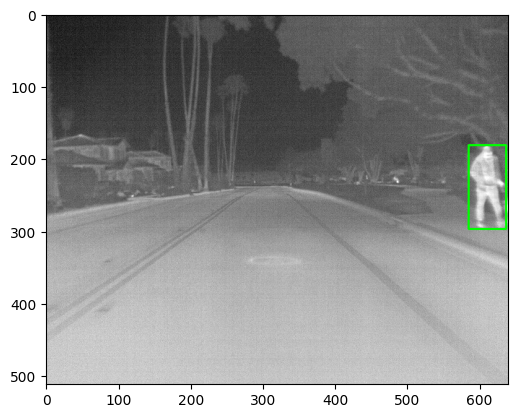

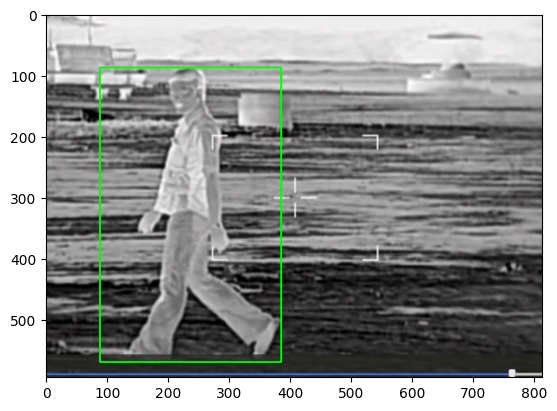

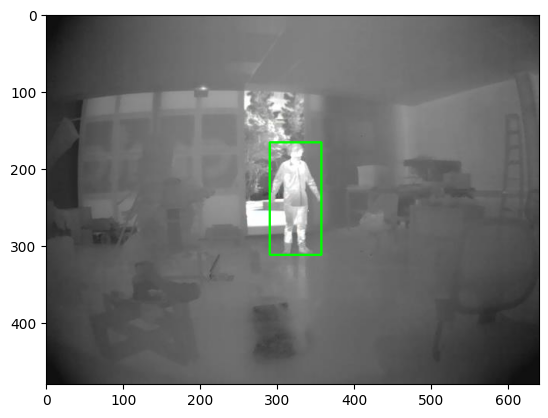

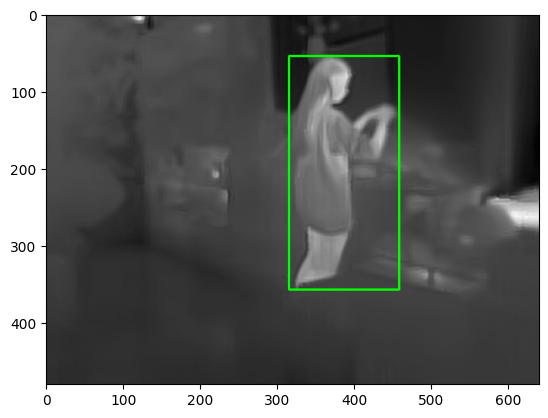

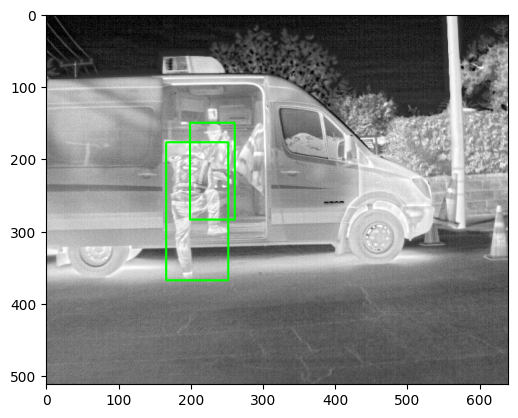

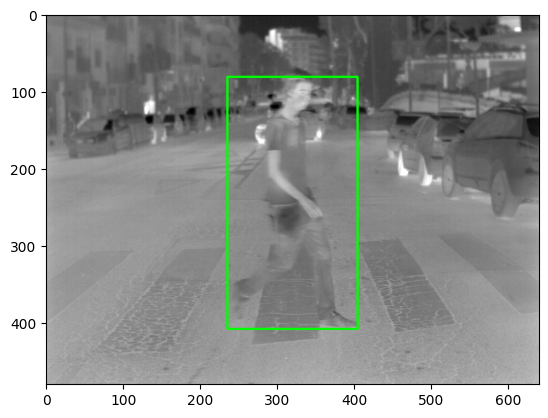

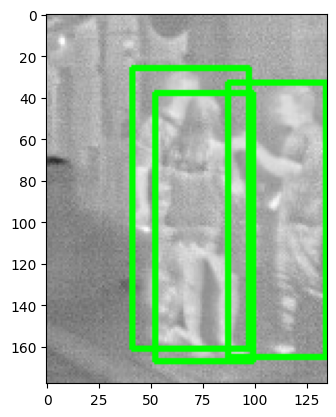

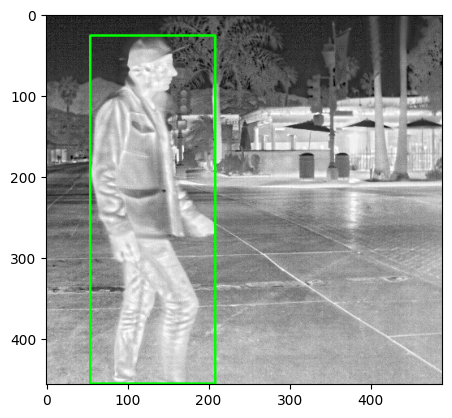

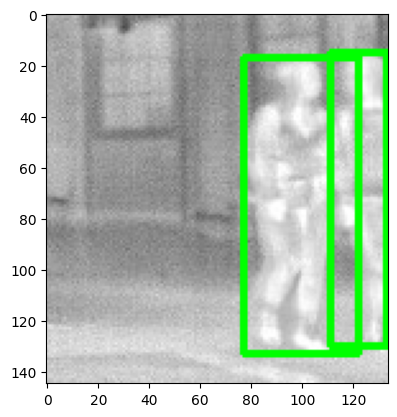

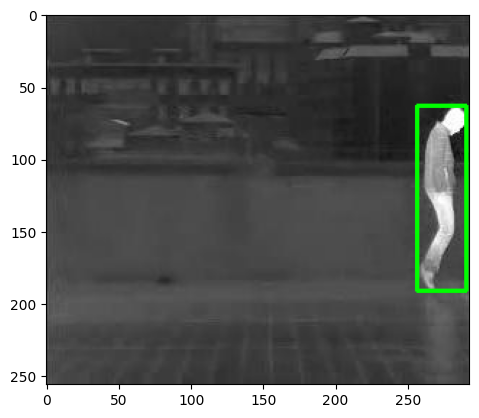

In [83]:
import cv2
import matplotlib.pyplot as plt


n_show = 10
vis_yolo_anns = pd.DataFrame(transformed_anns).sample(frac=1)
count = 0
for _, img_data in vis_yolo_anns.iterrows():
    img = cv2.imread(img_data["filepath"])
    height, width, _ = img.shape
    for ann in img_data["ann"]:
        bbox_width = ann[3]*width
        bbox_height = ann[4]*height
        xc = ann[1]*width
        yc = ann[2]*height
        x1 = int(xc -bbox_width/2)
        y1 = int(yc - bbox_height/2)
        x2 = int(xc + bbox_width/2)
        y2 = int(yc + bbox_height/2)
        img = cv2.rectangle(img, (x1,y1),(x2,y2),color = (0,255,0),thickness = 2)
    plt.imshow(img)
    plt.show()
    count += 1
    if count == n_show:
        break